# Importing Libraries and Data

In [11]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
# Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 
# Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 
# This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [12]:
path = r'C:\Users\simpe\Citi Bike Analysis'

In [13]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_7.csv'), index_col = False)

# Checking Ride Start Time and Date

In [14]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [15]:
file_path = os.path.join(path, '02 Data','prepared data','citi_7.csv')

In [16]:
parse_dates = ['ride_start_date']

In [17]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [18]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41017 entries, 0 to 41016
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               41017 non-null  int64         
 1   day_of_week              41017 non-null  object        
 2   start_hour               41017 non-null  int64         
 3   start_station_id         41017 non-null  int64         
 4   start_station_name       41017 non-null  object        
 5   start_station_latitude   41017 non-null  float64       
 6   start_station_longitude  41017 non-null  float64       
 7   end_station_id           41017 non-null  int64         
 8   end_station_name         41017 non-null  object        
 9   end_station_latitude     41017 non-null  float64       
 10  end_station_longitude    41017 non-null  float64       
 11  trip_duration            41017 non-null  int64         
 12  subscriber               41017 n

# Cleaning Wrangling Subsetting

In [19]:
#ride counts by day
day_counts = citi.groupby( citi['ride_start_date'].dt.date)['ride_start_date'].count()

In [20]:
day_counts

ride_start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: ride_start_date, dtype: int64

In [21]:
#avg duration trip on day
avg_ride_duration_day = citi.groupby('ride_start_date')['trip_duration'].mean()

In [22]:
avg_ride_duration_day

ride_start_date
2013-09-01    735.274348
2013-09-02    675.447740
2013-09-03    686.549962
2013-09-04    713.929204
2013-09-05    712.066327
2013-09-06    693.772039
2013-09-07    731.380952
2013-09-08    736.000000
2013-09-09    691.850682
2013-09-10    687.388220
2013-09-11    674.304830
2013-09-12    671.300971
2013-09-13    688.204294
2013-09-14    691.806023
2013-09-15    722.729683
2013-09-16    680.896979
2013-09-17    681.016291
2013-09-18    680.636875
2013-09-19    687.445501
2013-09-20    691.693482
2013-09-21    700.793133
2013-09-22    720.921772
2013-09-23    699.183578
2013-09-24    680.915162
2013-09-25    701.739675
2013-09-26    680.911468
2013-09-27    711.543974
2013-09-28    719.056090
2013-09-29    704.512704
2013-09-30    690.719725
Name: trip_duration, dtype: float64

In [23]:
# Merging Together
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})

In [24]:
result

,date,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


In [25]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [26]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327


# I chose these data points because this is the first month of Citi Bike. My goal is to analyze trends in ride frequency, particularly to predict how many rides might happen in the second month. I also included trip duration in case there's potential to explore it further in the future, but for now, my primary focus is on the date and ride count.

In [27]:
# Reset index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [28]:
result_2.head()

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327


In [29]:
result_3 = result_2[['datetime','ride_count']]

In [30]:
result_3

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372
5,2013-09-06,1452
6,2013-09-07,1134
7,2013-09-08,1129
8,2013-09-09,1393
9,2013-09-10,1579


In [31]:
# Reset index so that you can use the "Date" column as a filter

result_3 = result.reset_index()

In [32]:
result_3

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


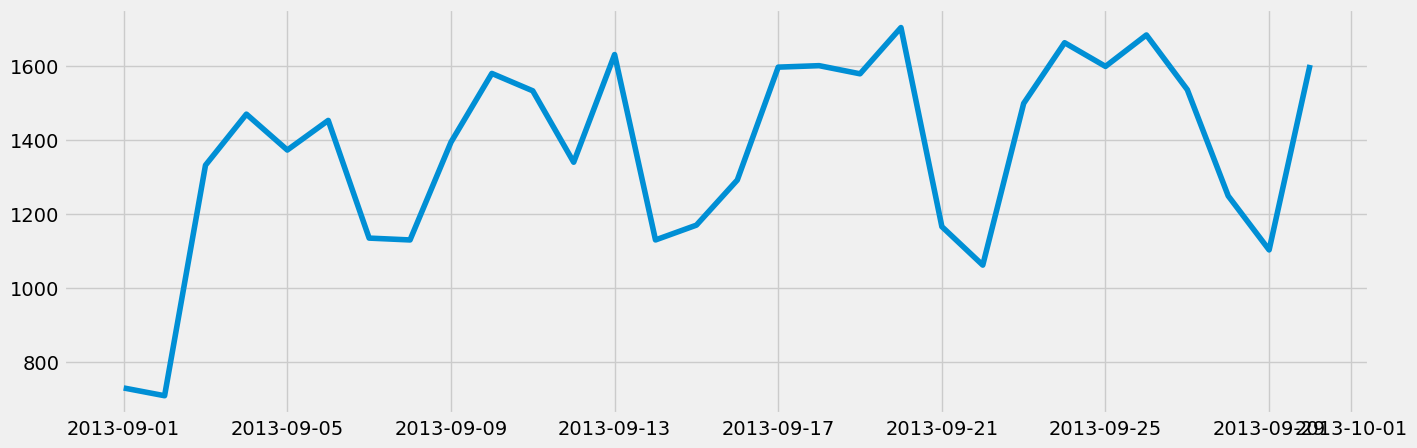

In [33]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

## It looks like there is some autocorrleation on the ride count depending on the day

In [34]:
day_counts

ride_start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: ride_start_date, dtype: int64

# Checking Missing Values

In [35]:
day_counts.isnull().sum() 

0

# Time Series Analysis - Decomposition

In [36]:
result

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327
2013-09-06,1452,693.772039
2013-09-07,1134,731.380952
2013-09-08,1129,736.000000
2013-09-09,1393,691.850682


# Dropping a Column

In [37]:
column_to_drop = 'avg_duration'

In [38]:
result = result.drop(column_to_drop, axis=1)

In [39]:
result

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


In [40]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [41]:
result_1

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372
5,2013-09-06,1452
6,2013-09-07,1134
7,2013-09-08,1129
8,2013-09-09,1393
9,2013-09-10,1579


In [44]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 612.0 bytes


In [45]:
time_series = result_1['ride_count']

In [46]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [47]:
result_1.set_index('datetime', inplace=True)

In [48]:
result_1.index.freq = 'D'

In [49]:
time_series = result_1['ride_count']

In [50]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [51]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

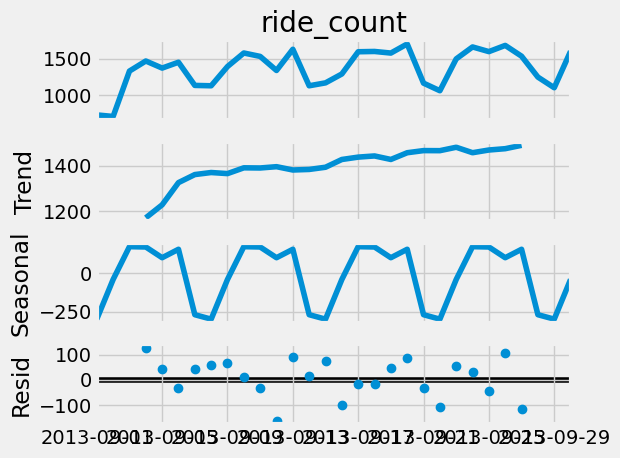

In [52]:
# Plot the separate components

decomposition.plot()
plt.show()

In [53]:
result_1

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


### The level and trend are distinct, indicating a need for smoothing. The trend shows an upward pattern, suggesting that the number of riders increases as the month progresses. There also seems to be a seasonal component, along with a significant amount of noise.

# Testing for Stationarity

In [56]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.728335
p-value                         0.003732
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


# The p-value is highly significant. 
##### The null hypothesis, which we're aiming to disprove, suggests the presence of a unit root. By disproving this, we can conclude that the data is stationary. The existence of a unit root would indicate that the data is non-stationary, which is undesirable in this context.
##### When comparing the test statistic to the critical value, my test statistic is smaller than the critical value at both the 5% and 10% levels, and the p-value is satisfactory.
##### It doesnt look like I need to perform differencing.

# Checking Data’s Autocorrelations

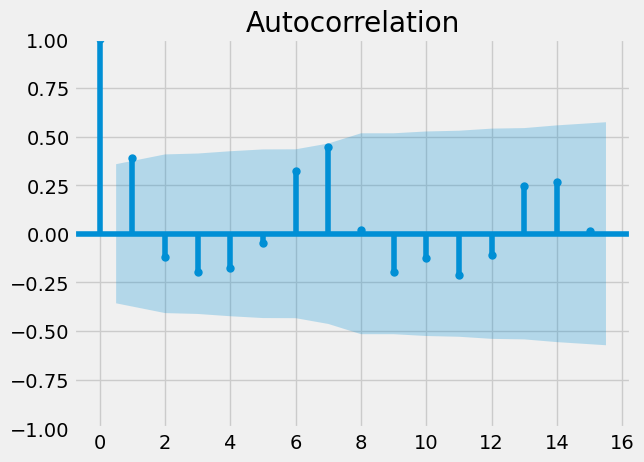

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

# Saving to CSV

In [58]:
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_8.csv'))